In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

In [3]:
#Q1:觀察票價是否有異常值的現象?
#方法1
#進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。
df_train['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [4]:
bins = list(range(0,520,5))
df_train['Farerange'] = pd.cut(df_train.Fare, bins,include_lowest = True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farerange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(5.0, 10.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(70.0, 75.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(5.0, 10.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50.0, 55.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(5.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(10.0, 15.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(25.0, 30.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"(20.0, 25.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(25.0, 30.0]"


C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


平均值落在32.2$而75%位數卻在31，表示有極長的右尾; 標準差為49.69，但有最大值出現在512.32，三個標準差外，150$價位以上的傳票也有數個


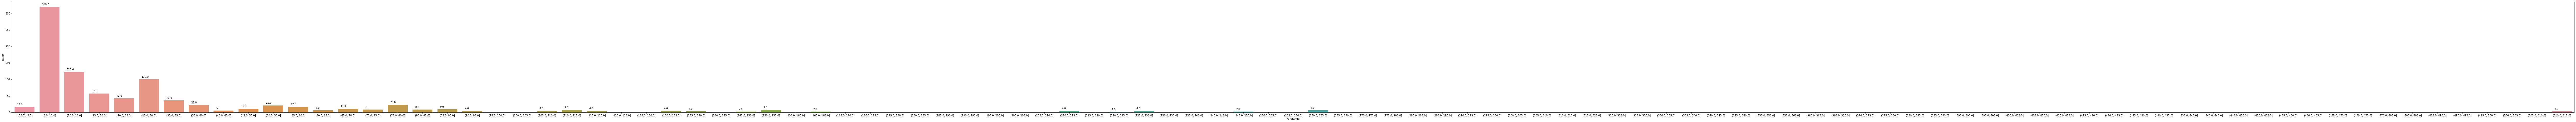

In [5]:
fig = plt.figure(figsize=(180,8))
ax=sns.countplot(df_train["Farerange"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
print('平均值落在32.2$而75%位數卻在31，表示有極長的右尾; 標準差為49.69，但有最大值出現在512.32，三個標準差外，150$價位以上的傳票也有數個')

In [6]:
#方法 2
#進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。
u=32.204208
std=49.693429
error=df_train[np.abs(df_train['Fare']-u)>3*std]
data_c=df_train[np.abs(df_train['Fare']-u)<=3*std]
print('異常值:')
error

異常值:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farerange
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,"(260.0, 265.0]"
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,"(260.0, 265.0]"
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,"(245.0, 250.0]"
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"(510.0, 515.0]"
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,"(245.0, 250.0]"
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,"(260.0, 265.0]"
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,"(260.0, 265.0]"
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,"(210.0, 215.0]"
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,"(225.0, 230.0]"
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,"(260.0, 265.0]"


找出的異常可能是正常反映了真實的結果造成的一些離異，可以用分群做處理


C:\Users\e3105\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


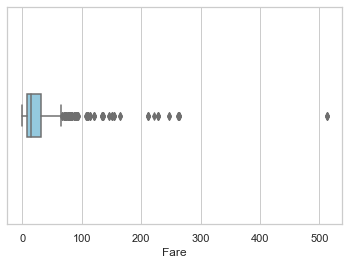

In [7]:
#方法3-盒鬚圖判別法(IQR method)

#Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎? 
sns.set(style="whitegrid")
ax = sns.boxplot(x = df_train["Fare"], orient = "v", color = "skyblue", width=0.2)  # 畫盒圖
#ax = sns.swarmplot(x = df_train["Fare"], orient = "v", color = "red")
print('找出的異常可能是正常反映了真實的結果造成的一些離異，可以用分群做處理')